In [44]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
path="titanic.csv"
data = pd.read_csv(path)

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.shape

(891, 12)

In [48]:
data_features = list(zip(
        [i for i in data.columns],
        zip(
        [str(i) for i in data.dtypes],
        [i for i in data.isnull().sum()])))
data_features

[('PassengerId', ('int64', 0)),
 ('Survived', ('int64', 0)),
 ('Pclass', ('int64', 0)),
 ('Name', ('object', 0)),
 ('Sex', ('object', 0)),
 ('Age', ('float64', 177)),
 ('SibSp', ('int64', 0)),
 ('Parch', ('int64', 0)),
 ('Ticket', ('object', 0)),
 ('Fare', ('float64', 0)),
 ('Cabin', ('object', 687)),
 ('Embarked', ('object', 2))]

In [49]:
[(c, data[c].isnull().mean()) for c in data.columns]

[('PassengerId', 0.0),
 ('Survived', 0.0),
 ('Pclass', 0.0),
 ('Name', 0.0),
 ('Sex', 0.0),
 ('Age', 0.19865319865319866),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Ticket', 0.0),
 ('Fare', 0.0),
 ('Cabin', 0.7710437710437711),
 ('Embarked', 0.002244668911335578)]

In [50]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['Age', 'Cabin', 'Embarked']

In [51]:
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('Age', 177), ('Cabin', 687), ('Embarked', 2)]

In [52]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['Age', 'Cabin', 'Embarked']

In [53]:
# Удаление пропусков
data_drop = data[hcols_with_na_temp].dropna()
data_drop.shape

(183, 3)

In [54]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

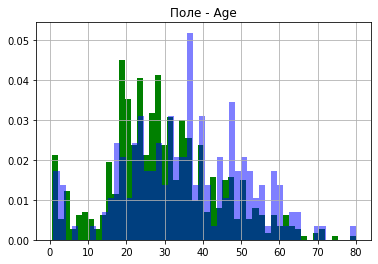

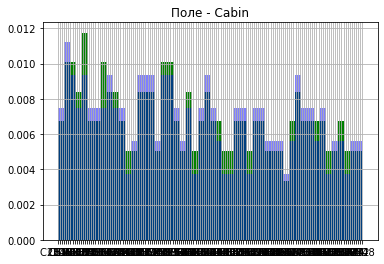

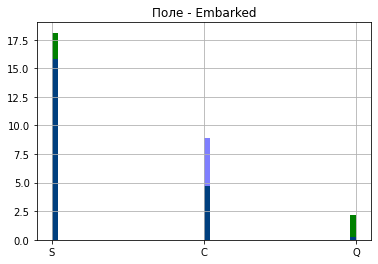

In [55]:
plot_hist_diff(data, data_drop, hcols_with_na_temp)

In [56]:
# Удалим колонки с высоким процентом (более 50%) пропусков:
data_col_drop = data.dropna(axis=1, thresh=450)
[(c, data[c].isnull().sum()) for c in data_col_drop]

[('PassengerId', 0),
 ('Survived', 0),
 ('Pclass', 0),
 ('Name', 0),
 ('Sex', 0),
 ('Age', 177),
 ('SibSp', 0),
 ('Parch', 0),
 ('Ticket', 0),
 ('Fare', 0),
 ('Embarked', 2)]

In [62]:
# Заполним пропуски средними значениями:
def impute_na(df,variable,value):
        df[variable].fillna(value,inplace=True)
data_fill = data_col_drop.copy()
impute_na(data_fill,'Age',data['Age'].mean())

In [63]:
data_fill.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

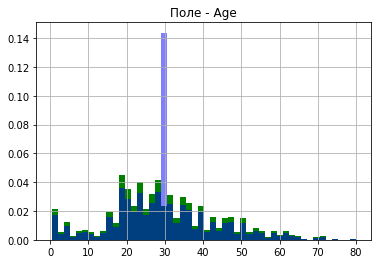

In [65]:
plot_hist_diff(data, data_fill, ['Age'])

In [66]:
# Кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()
cat_enc_le=le.fit_transform(data['Age'])

In [70]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [77]:
import numpy as np
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88], dtype=int64)

In [74]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [78]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Нормализация цифровых признаков

In [82]:
from scipy.stats import stats
def diagnostic_plots(df,variable):
    plt.figure(figsize=(15,6))
    #гистрограмма
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    ##Q-Q-plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()




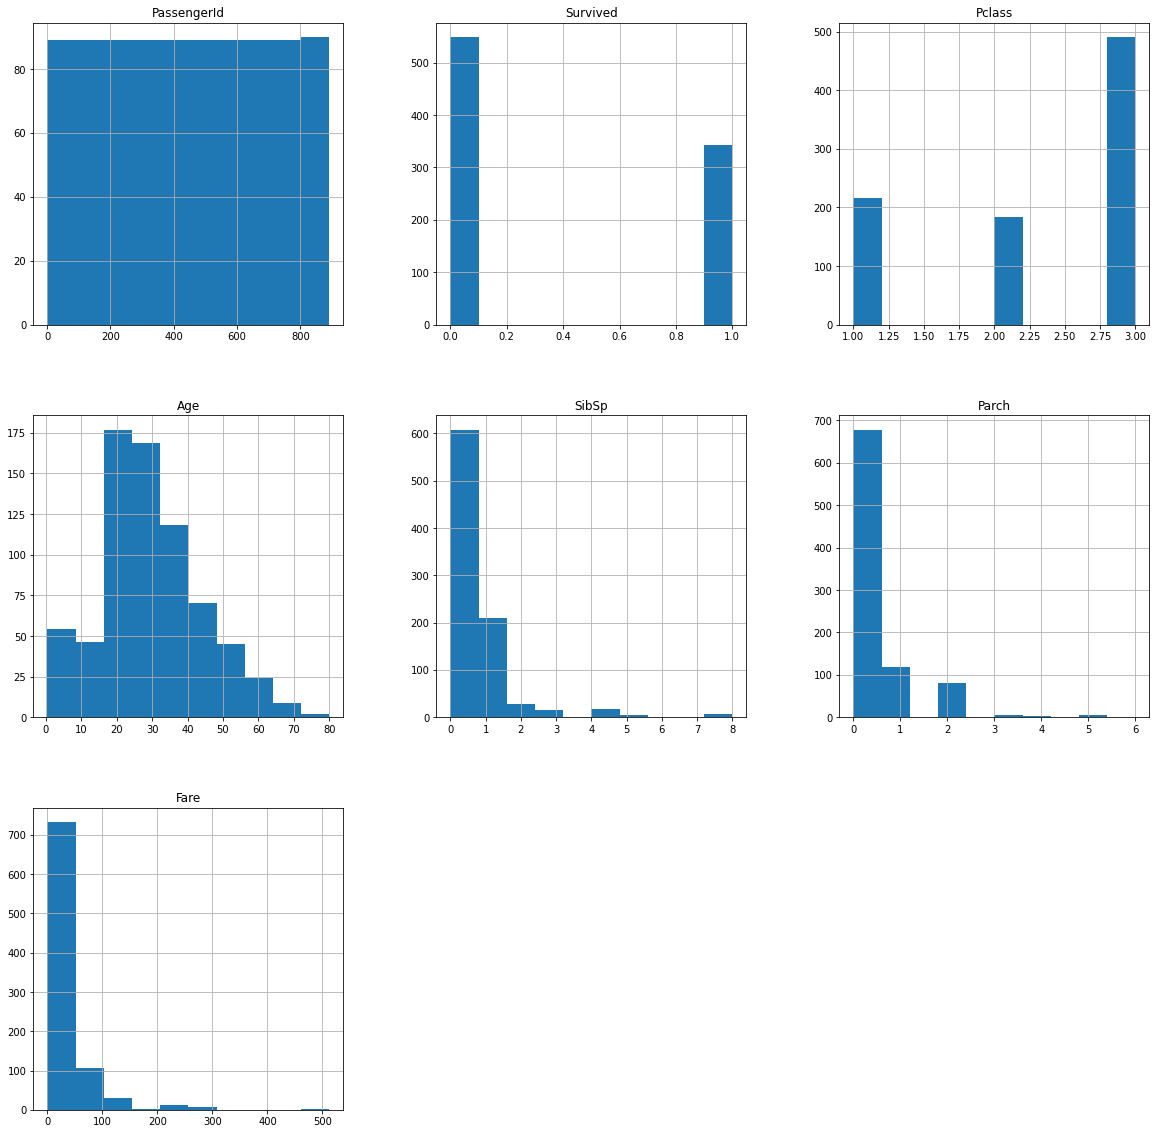

In [84]:
data.hist(figsize=(20,20))
plt.show()

c:\Users\stemo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\stemo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\stemo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
c:\Users\stemo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


{'bodies': [<matplotlib.collections.PolyCollection at 0x16d23392bb0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x16d23392ca0>,
 'cmins': <matplotlib.collections.LineCollection at 0x16d2341a820>,
 'cbars': <matplotlib.collections.LineCollection at 0x16d2341ac10>}

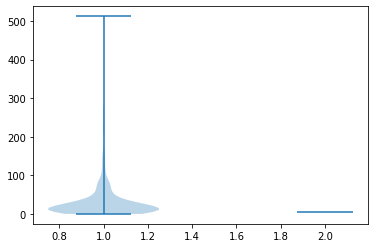

In [87]:
normalized_data=np.log(data_fill['Fare'])

plt.violinplot([data_fill["Fare"],normalized_data,])
